<h1>Aktivierungsfunktionen in neuralen Netzen</h1>

Aktivierungsfunktionen sind kleinere Funktionen, die Neuron haben, die einen Output generieren.
- Funktionen verändern den Wertebereich und geben Aufschluss, wie sehr sich der Output abhängig vom Input verändert.

Jeder Neuron hat zu Beginn zufällig initialisierte Weights (Gewichte). Das Ziel ist es, diese Weights so anzupassen, dass der Fehler, der am Ende berechnet wird (Loss, total Error) minimal wird. Dieser Vorgang ist das Training.

<i>Abb1</i>: Eingabe der Features in ein einziges Neuron. Jedes Neuron hat 2 Komponente.

<img src="./img/nn_1.PNG" width=600 hight=400>

Die Funktion wandeln das Ergebnis der Summe in eine andere Zahl um, wie z. B. die Zahl 50 in 0,5.

Mit einer Sigmoidfunktion am Ende des Netzes können die Zahlen in den Bereich von 0 bis 1 umgewandelt werden. Dadurch eine es viel einfacher eine Entscheidung zu treffen. 

Kleinere Zahlen sind besser für ein Netzwerk geeignet als sehr große Zahlen. 

Es gibt viele dieser Funktionen, die unterschiedliche Aufgabe haben. Eine Funktion, die linear ist, gibt den Output so weiter wie dieser angekommen ist, mit anderen Worten, genau das Ergebnis der Summe.

Die Berechnung der linearen Outputs ist weit weniger aufwendig als bei den andere Funktion, wo verschiedene mathematische Operationen ausgeführt werden müssen. Frameworks wie PyTorch, Tensorflow, usw. haben diese Algorithmen effizient passend zur Hardware implementiert, oder nutzen spezielle Libraries, wo dies schon implementiert sind. Die Berechnungen müssen sehr effizient laufen, da es sehr viele Neuronen und Layers in einem Netzwerk gibt. Eine langsame Berechnung verlängert das Training.  
In C++ könnte man z. B. Intrinsics nutzen, um effizient die Vektorisierung der CPU zu verwenden.

Daher ist es wichtig zu verstehen, welche Auswirkungen verschiedenen Funktionen haben, und welche Funktionen wo besser eingesetzt werden sollten. Ohne die Aktivierungsfunktion kann die Gleichung als einfache lineare Funktion dargestellt werden. Komplexere Probleme können aber nicht einfach linear gelöst werden.

<i>Abb2</i>: Einfaches neurales Netz.

<img src="./img/nn_3.PNG" width=600 hight=400>

Die Weights eines Model beeinflussen wie stark sich ein kommender Wert eines Neurons oder Inputs auf das Ergebnis der Summe auswirkt. Mit der Veränderung der Gewichte ändert sich auch das Ergebnis, und damit hoffentlich der Gesamtfehler am Ende, der minimiert werden soll.

Verschiedene Funktionen haben auch einen unterschiedlichen Umgang mit Outlier. 

<i>Abb3</i>: Grobes Beispiel wie eine Funktion Datenpunkte abdeckt.

<img src="./img/nn_2.PNG" width=600 hight=400>

Ein anderes Beispiel wäre, wenn der Output eines Netzes fünf Neuronen für die Klassifizierung hat, kann eine falsch angewendete Aktivierungsfunktion dafür sorgen, dass der Output genau 1 oder 0 ist. 

Bei einer Klassifizierung wäre es besser einen Bereich zwischen 0 und 1 Anzugeben (wie 0,3, 0,567, oder 0,81), wo der höchste Wert z. B. 0,91 als positiv gewertet wird. 

<i>Abb4</i>: Auswahl der falschen Aktivierungsfunktion sorgt dafür, das der Output entweder 1 oder 0 ist.

<img src="./img/nn_4.PNG" width=600 hight=400>

Ein andere sehr wichtiger Punkt ist: Eine ausgewählte Funktion kann bei bestimmten Eingaben ein Problem mit sich bringen. <bR>
(Es gibt viele interessante Artikel darüber)
- Vanishing-Gradient
- Exploding-Gradient

Vanishing-Gradient beschreibt das Problem, dass die Steigung einer Funktion sich bei bestimmten Eingaben nicht groß verändert. Durch eine sehr geringe Veränderung ist der Anpassungsprozess des Gradienten langsam => langsames lernen.

Je nach Framework können die Funktionen mit Parametern angepasst werden.

<h1>Code</h1>

Mit Frameworks wie Tensorflow können die verschiedenen Funktionen direkt angewendet werden.

In [307]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [97]:
# Zeichne Funktion.
def draw_plot(X, y, title:str, verc:int=0, horiz_act:bool=False, horiz:float=0.6):
    intp = interp1d(x=X, y=y, kind=2)
    x2 = np.linspace(start=X[0], stop=X[len(X)-1], num=2000)
    y2 = intp(x2)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel('y')
    plt.grid()
    plt.plot(x2, y2, color='green' )
    plt.axvline(x = verc, color = 'black', linestyle='--')
    
    if horiz_act:
        plt.hlines(y = horiz, color = 'black', linestyle='--', xmin=X[0], xmax=X[len(X)-1])
    
    plt.show()

<h2>Sigmoid</h2>

Sigmoid Funktion: <br>
$
f(x) = \frac{1}{1 + e^{-x} }
$

In [4]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.sigmoid(10.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999546>

In [10]:
# In Python Code:
def sigmoid_funk(x:float):
    return 1 / (1 + math.exp(-x))

sigmoid_funk(10.0)

0.9999546021312976

In [101]:
X = np.array(range(-10, 10))
y = [sigmoid_funk(i)  for i in X]

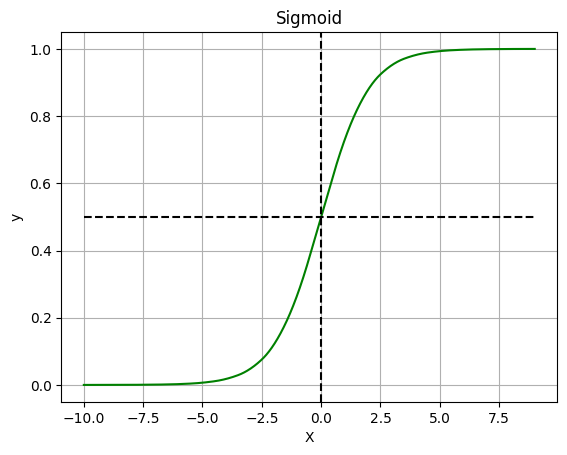

In [102]:
draw_plot(X, y, 'Sigmoid', horiz_act=True, horiz=0.5)

Die Sigmoidfunktion quetscht alle X-Werte in den 0 bis 1 Bereich. Der höchste dieser Werte könnte z. B. positiv interpretiert werden. Diese Funktion eignet sich gut für die letzte Schicht. 

<h2>Hard-Sigmoid</h2>

Hard-Sigmoid Funktion: <br>

$
f(x) = \left\{
    \begin{array}\\
        0 & \mbox{if. }\ x < -2.5 \\
        1 & \mbox{if. }\ x >  +2.5  \\
        0.2 * x + 0.5 & \mbox{if.} \ -2.5 <= x <= 2.5
    \end{array}
\right.
$

In [308]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.hard_sigmoid( tf.convert_to_tensor(10.0) )

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [309]:
# In Python Code:
def hard_sigmoud_funk_1(x):
    return max(0, min(1, (2*x +5)/10 ))

def hard_sigmoud_funk_2(x):
    if x > 2.5:
        return 1
    elif x<-2.5:
        return 0
    elif -2.5 <= x <= 2.5:
        return 0.2 * x + 0.5

In [310]:
X = np.arange(-10, 10, 0.2)
y = [hard_sigmoud_funk_2(i)  for i in X]

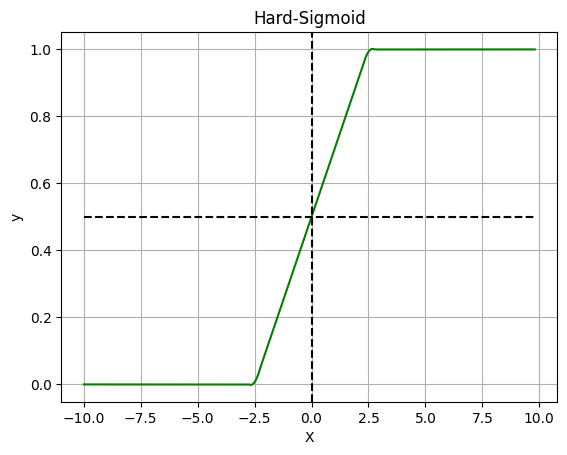

In [311]:
draw_plot(X, y, 'Hard-Sigmoid', horiz_act=True, horiz=0.5)

In [123]:
(hard_sigmoud_funk_1(-2.4999), hard_sigmoud_funk_1(-2.5),  hard_sigmoud_funk_1(2.5),  hard_sigmoud_funk_1(2.499)) 

(2.0000000000042208e-05, 0, 1, 0.9998000000000001)

In [124]:
(hard_sigmoud_funk_2(-2.4999), hard_sigmoud_funk_2(-2.5),  hard_sigmoud_funk_2(2.5),  hard_sigmoud_funk_2(2.499)) 

(2.0000000000020002e-05, 0.0, 1.0, 0.9998)

Diese Funktion ist eine lineare Annäherung an die Sigmoidfunktion und beansprucht weniger Rechenleistung.

Beide sind gut, wenn es um binäre Klassifizierung geht.

<h2>Linear</h2>

Lineare Funktion:

$
f(x) = x
$


In [125]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.linear(43)

43

In [126]:
# In Python Code:
def linear_funk(x):
    return x

In [127]:
X = np.arange(-10, 10, 0.2)
y = [linear_funk(i)  for i in X]

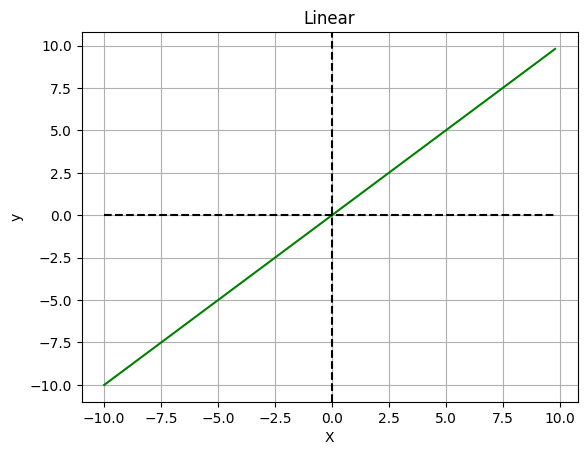

In [129]:
draw_plot(X, y, 'Linear', horiz_act=True, horiz=0)

Bei der linearen Aktivierungsfunktion werden die Werte so weitergegeben wie sie kommen. <br>
Dadurch sind die Berechnungskosten sehr niedrig => Rufe Funktion auf und geben den Wert zurück.

<h2>ReLU (Rectified Linear Unit)</h2>

ReLU Formel:

$
f(x) = \left\{
    \begin{array}\\
        0 & \mbox{if. }\ x <= 0 \\
        x & \mbox{if. }\ x > 0 \\
    \end{array}
\right.
$


Oft auch als:

$
f(x) = max(x, 0)
$

In [135]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.relu([5, -5])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 0])>

In [131]:
# In Python Code:
def relu_funk(x):
    return max(0,x)

In [132]:
X = np.arange(-10, 10, 0.2)
y = [relu_funk(i)  for i in X]

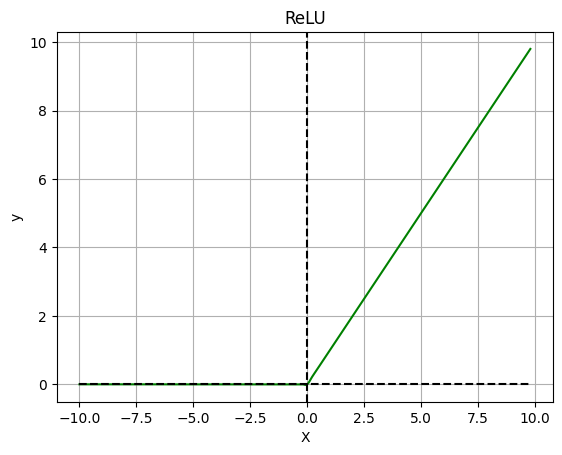

In [134]:
draw_plot(X, y, 'ReLU', horiz_act=True, horiz=0)

In [312]:
relu_funk(-5)

0

In [313]:
relu_funk(3)

3

Diese Funktion ist in aller Munde und wird sehr gerne für Deep-Learning genutzt. Die Berechnungskosten sind hier auch relativ gering gegenüber anderen. Für Inputs die kleiner 0 sind, wird 0 zurückgegeben, sonst wandert der Input weiter. 

Hier kann das Phänomen Dying-ReLU auftauchen, was bedeutet, dass ein Neuron mit dieser Aktivierung dauerhaft inaktive bleiben kann, wenn es immer auf negative Werte trifft. Außerdem neigt es mehr zu Overfitting, dieser Effekt kann mit Dropouts reduziert werden. 

<h2>Leaky ReLU  (LReLU)</h2>

LReLU Formel:

$
f(x) = \left\{
    \begin{array}\\
        0 & \mbox{if. }\ 0.1x <= 0 \\
        x & \mbox{if. } x > 0 \\
    \end{array}
\right.
$

Oft auch mit Parameter:

$
f(x) = \left\{
    \begin{array}\\
        \alpha * x & \mbox{if. }\  x <= 0 \\
        x & \mbox{if. } x > 0 \\
    \end{array}
\right.
$

Oft auch als:

$
f(x) =  max ( \alpha * x, x) 
$

In [140]:
# Anwendung der Funktion mit Tensorflow.keras
# - Alpha Standard: -0.2
tf.keras.activations.leaky_relu(6, negative_slope=0.2)

In [148]:
# In Python Code:
def lrelu_funk(x, alpha:float=0.1):
    return max(alpha*x, x)

In [149]:
X = np.arange(-10, 10, 0.2)
y = [lrelu_funk(i)  for i in X]

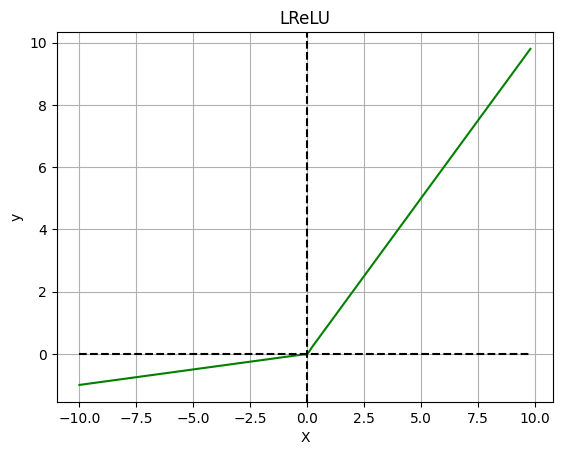

In [150]:
draw_plot(X, y, 'LReLU', horiz_act=True, horiz=0)

In [151]:
lrelu_funk(-100)

-10.0

Um das Problem mit Dying-ReLU anzugehen, wird hier zusätzlich ein Parameter angeben, mit dem diese Funktion negative Werte mitnehmen kann.

Damit kann sichergestellt werden, dass das Neuron nicht dauerhaft inaktiv bleibt. 

<h2>GELU (Gaussian Error Linear Unit)</h2>

GELU Formel:
- ERF: Gaußsche Fehlerfunktion.<br>

$
\frac{1}{2}x (1 + erf  ( \frac{x}{\sqrt2} ))
$

In [158]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.gelu(-1.5)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.100210726>

In [159]:
# In Python Code:
def gelu_funk(x):
    return 0.5*x * ( 1 + math.erf(x/math.sqrt(2)) )

In [160]:
X = np.arange(-10, 10, 0.2)
y = [gelu_funk(i)  for i in X]

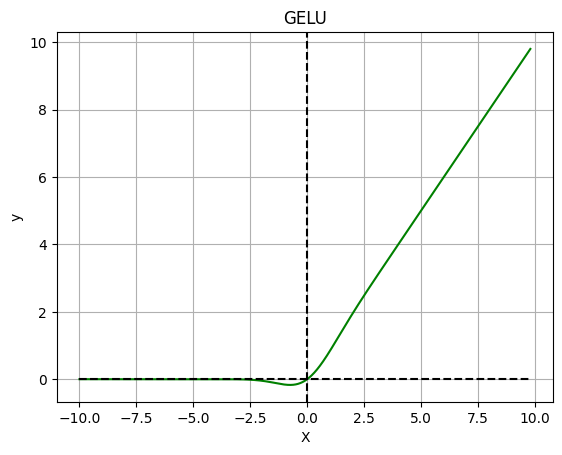

In [162]:
draw_plot(X, y, 'GELU', horiz_act=True, horiz=0)

In [164]:
gelu_funk(-1.5)

-0.10021080190328713

GELU findet auch viele Anwendungszwecken wie z. B. Computer-Vision und NPL. Die Berechnungskosten sind hier höher.

<h2>Tanh (Tangens hyperbolicus)</h2>

Tanh Formel:

$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$

In [153]:
# Anwendung der Funktion mit Tensorflow.keras
tf.keras.activations.tanh(5.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99990916>

In [155]:
# In Python Code:
def tanh_funk(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [156]:
X = np.arange(-10, 10, 0.2)
y = [tanh_funk(i)  for i in X]

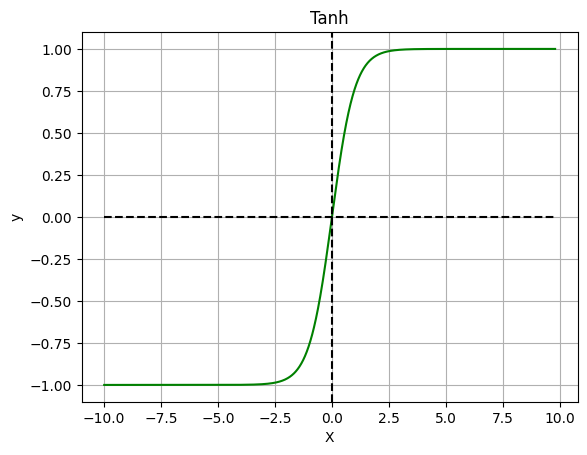

In [157]:
draw_plot(X, y, 'Tanh', horiz_act=True, horiz=0)

In [163]:
tanh_funk(5.0)

0.999909204262595

Dies Funktion quetscht alle Werte in den Bereich -1 bis 1. Dabei ist diese Funktion zentrierter. Auch hier taucht das Problem Vanishing-Gradient auf.

Meist eingesetzt bei RNNs, wenn es um NLP und Spracherkennung geht. 

Alternativ bietet sich auch Hard-Tanh an, welches auch bessere Ergebnisse liefern kann.

<h2>Softmax</h2>

Softmax Formel:

$
Output Vector = \frac{e^{x_i}}{\sum^{J}_{j=1} \ e^{x_j}}
$

In [168]:
tf.keras.activations.softmax(tf.convert_to_tensor([[3, 1.5, 0.5]]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.76615715, 0.17095277, 0.06289001]], dtype=float32)>

In [171]:
# In Python Code:
def softmax_funk(x:[]):
    res_vec = []

    for i in range(len(x)):
        res_vec.append( math.exp(x[i]) / sum([ math.exp(k) for k in x])  )
    
    return res_vec

In [176]:
X = [3, 1.5, 0.5]
y = softmax_funk(x)

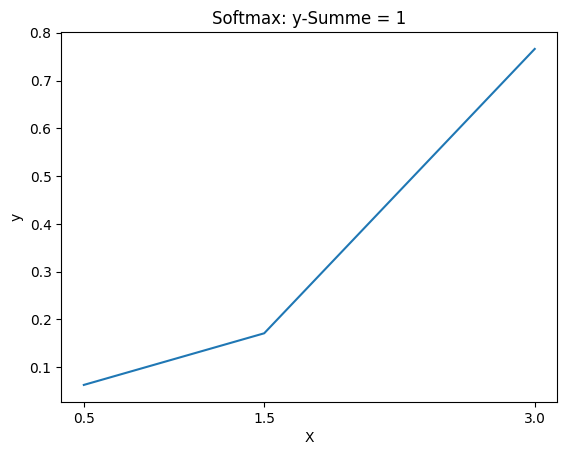

In [183]:
plt.xlabel('X')
plt.ylabel('y')
plt.xticks([3, 1.5, 0.5])
plt.title('Softmax: y-Summe = 1')
plt.plot(X, y)

In [184]:
softmax_funk(X)

[0.7661572065563422, 0.17095278019779026, 0.0628900132458675]

In [187]:
1 == sum( softmax_funk(X) )

True

Softmax wird hauptsächlich am Ende des Netzes benutzt, um eine Klassifizierung durchzuführen. 

Als Input nimmt es ein Vektor und berechnet damit die Wahrscheinlichkeit für jede Klasse. Dabei ist die Summe des Ergebnisses immer 1. 

Softmax eignet sich sehr gut für Multiclass-Klassifizierungen. Und Sigmoid für die Binäre-Klassifizierung. 

Es gibt noch weitere Funktionen, die das Training positiv beeinflussen könne. Durch eine gegebene Formel sind die Funktionen einfach und schnell in Python implementierbar, man muss nur der Formel folgen.

<h1>Keras Model</h1>

Wir können mit einem Überschaubaren Netz die verschiedenen Funktionen ausprobieren.

Die Abbildung 1 zeigt nochmal eine kleine Übersicht eines Netzes, das genau aus einem Neuron besteht.

<i>Abb1</i>: Eingabe der Features in ein einziges Neuron. Jedes Neuron hat 2 Komponente.

<img src="./img/nn_1.PNG" width=600 hight=400>

In [281]:
# Einfaches Netz.:
model = tf.keras.Sequential([
    # L1: 2 Neuronen
    # L2: 1 Neuron
    # input_shape=(2,) => [ [1,2], [3,4] ]
    # bias_initializer: soll 0 sein.
    # kernel_initializer (Weights): sollen 1 sein.
    tf.keras.layers.Dense(units=1, input_shape=(2,), bias_initializer='zeros', kernel_initializer="ones", name="L1"),
])

model.build(input_shape=(2,))

In [282]:
model.get_layer('L1').get_weights()

[array([[1.],
        [1.]], dtype=float32),
 array([0.], dtype=float32)]

Beide Weights sind mit dem Wert 1 initialisiert, Bias ist 0.

Bei der Eingabe (forward pass) von [2, 2] sollte also (das) herauskommen.: <br>

$
res = w1(2) * 2 + w2(2) * 2 + 0 = 4
$


In [283]:
input_tensor = tf.convert_to_tensor([ [2, 2] ] )
model.predict(input_tensor)

1/1 [==============================] - 0s 30ms/step


array([[4.]], dtype=float32)

In [284]:
## Softmax ## 1 Output Neuron. 
# - Mit einem Neuron als Output muss das Ergebnis 1 sein.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(10,), \
                          bias_initializer='zeros', kernel_initializer="ones", \
                         activation="softmax"),
])

model.build(input_shape=(10,))

In [286]:
X = np.arange(-5, 5, 1 )
input_tensor = tf.convert_to_tensor([ X  ] )
model.predict(input_tensor)

1/1 [==============================] - 0s 37ms/step


array([[1.]], dtype=float32)

In [290]:
## Softmax ## 2 Output Neuronen.
# - Die Summe des Ergebnisses muss 1 sein. 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, input_shape=(10,), \
                          bias_initializer='zeros', kernel_initializer="ones", \
                         activation="softmax"),
])

model.build(input_shape=(10,))

In [293]:
X = np.arange(-5, 5, 1 )
input_tensor = tf.convert_to_tensor([ X  ] )
res = model.predict(input_tensor)

1/1 [==============================] - 0s 14ms/step


In [301]:
1 == sum(np.array(res[0]))

True

Die ganzen Spielereien könnte man mit verschiedenen Funktionen und Netzaufbauten durchführen, es ist nichts anderes als die Verkettung von mathematische Operationen.

Bei größeren Netzen ist es weniger überschaubar. Wenn am Anfang eines Netzes durch eine falsch eingesetzte Aktivierungsfunktion die Ergebnisse verschlechtert werden, wirkt sich das von vorne bis hinten auf das Endergebnis aus. Daher ist es wichtig zu verstehen, welche Auswirkung welche Funktionen haben, und welche man wo besser einsetzen sollte. 

Eine gängige Praxis ist z. B. ReLu beim Deep-Learning einzusetzen, und bei der letzten Schicht Softmax. Bei einer moderaten Trainingsdauer können verschiedene Funktionen getestet werden. Bei sehr großen Netzen sollte vorher gut überlegt werden.

Die untere Zelle zeigt nochmal ein Beispiel mit Sigmoid. Dem Ergebnis nach sieht man deutlich den Unterschied. Softmax wandelt den gesamten Vektor in den Bereich 0 bis 1 um, die Summe des Vektors ist 1. Die Zahlen kann man dann als Wahrscheinlichkeit interpretieren. Sigmoid hingegen wandelt alle Zahlen einzeln um.

In [303]:
## Sigmoid ## 2 Output Neuronen.
# - Die Summe des Ergebnisses muss 1 sein. 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, input_shape=(10,), \
                          bias_initializer='zeros', kernel_initializer="ones", \
                         activation="sigmoid"),
])

model.build(input_shape=(10,))

In [305]:
input_tensor = tf.convert_to_tensor([  X  ] )
res = model.predict(input_tensor)
res # 2 gleiche Ergebnisse, da 2 Neuronen, Weights sind alle 1.

1/1 [==============================] - 0s 15ms/step


array([[0.00669285, 0.00669285]], dtype=float32)

In [306]:
# Genau dasselbe mit unserer Funktion. 
sigmoid_funk(sum(X))

0.0066928509242848554